In [1]:
import scanpy as sc

[Executed on 2023-12-12 22:37:48.417369]


/proj/sensoryaging/.conda/env/scvi-envir/lib/python3.9/site-packages/h5py/__init__.py:36: UserWarning: h5py is running against HDF5 1.14.3 when it was built against 1.14.2, this may cause problems
  _warn(("h5py is running against HDF5 {0} when it was built against {1}, "


In [2]:
old_sgns=sc.read_h5ad('/proj/sensoryaging/data/data/up_dated_data/SGNs/FINAL_AFTER_11.7/known_cluster.h5ad')
new_sgns=sc.read_h5ad('/proj/sensoryaging/60_plates_data/Sgns/each_component/First_annotated.h5ad')

[Executed on 2023-12-12 22:40:16.346721]


In [9]:
new_sgns

[Executed on 2023-12-12 22:48:16.813386]


AnnData object with n_obs × n_vars = 3413 × 35675
    obs: 'platesID', 'batch', 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'n_counts', 'leiden', 'cell_type', 'leiden_2'
    var: 'n_cells', 'mt', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts', 'highly_variable', 'highly_variable_rank', 'means', 'variances', 'variances_norm', 'mean', 'std'
    uns: 'batch_colors', 'cell_type_colors', 'hvg', 'leiden', 'leiden_2_colors', 'leiden_colors', 'log1p', 'neighbors', 'pca', 'umap'
    obsm: 'X_pca', 'X_umap'
    varm: 'PCs'
    layers: 'Scale', 'log1p', 'reads', 'umi'
    obsp: 'connectivities', 'distances'

In [3]:
old_sgns

[Executed on 2023-12-12 22:44:41.745007]


AnnData object with n_obs × n_vars = 1722 × 33241
    obs: 'sample_ID_Plate', 'batch', 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'leiden', 'doublet_scores', 'predicted_doublets', 'sex', 'leiden_new', 'leiden_old', 'leiden_0', 'leiden_2', 'cell_type', 'leiden_no_osteocytes', 'gp0', 'gp1', 'gp2', 'gp3', 'gp4', 'gp5', 'gp6', 'leiden_R'
    var: 'mean', 'std', 'highly_variable-0', 'highly_variable_rank-0', 'means-0', 'variances-0', 'variances_norm-0', 'highly_variable-1', 'highly_variable_rank-1', 'means-1', 'variances-1', 'variances_norm-1'
    uns: 'cell_type_colors', 'leiden', 'leiden_2_colors', 'leiden_colors', 'leiden_no_osteocytes_colors', 'neighbors', 'pca', 'rank_genes_groups', 'umap'
    obsm: 'X_pca', 'X_umap', 'X_umapOriginal', 'X_umap_10.27'
    varm: 'PCs'
    layers: 'Scale', 'log1p', 'umi'
    obsp: 'connectivities', 'distances'

In [10]:
new_sgns.obs['platesID'].value_counts()

[Executed on 2023-12-12 22:48:21.696397]


platesID
11170728    361
11170729    345
11177025    338
11177020    323
11177026    296
11170726    273
11170731    267
11101606    254
11247074    249
11177028    228
11247668    156
11177066    126
11101603    103
11247716     94
Name: count, dtype: int64

[Executed on 2023-12-12 14:28:58.809656]


AnnData object with n_obs × n_vars = 3413 × 35675
    obs: 'platesID', 'batch', 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'n_counts', 'leiden', 'cell_type', 'leiden_2'
    var: 'n_cells', 'mt', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts', 'highly_variable', 'highly_variable_rank', 'means', 'variances', 'variances_norm', 'mean', 'std'
    uns: 'batch_colors', 'cell_type_colors', 'hvg', 'leiden', 'leiden_2_colors', 'leiden_colors', 'log1p', 'neighbors', 'pca', 'umap'
    obsm: 'X_pca', 'X_umap'
    varm: 'PCs'
    layers: 'Scale', 'log1p', 'reads', 'umi'
    obsp: 'connectivities', 'distances'

In [25]:
old_sgns.obs['age']='young'
new_sgns.obs['age']='old'

[Executed on 2023-12-12 15:16:46.268663]


In [26]:
merged=sc.concat([old_sgns,new_sgns])

[Executed on 2023-12-12 15:16:47.814174]


In [27]:
merged

[Executed on 2023-12-12 15:16:55.028051]


AnnData object with n_obs × n_vars = 5135 × 30819
    obs: 'batch', 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'leiden', 'leiden_2', 'cell_type', 'score', 'age'
    obsm: 'X_pca', 'X_umap'
    layers: 'Scale', 'log1p', 'umi'

In [28]:
merged.X=merged.layers['umi'].copy()

[Executed on 2023-12-12 15:16:59.056074]


In [29]:
sc.pp.normalize_per_cell(merged)

sc.pp.log1p(merged)

merged.layers['log1p']=merged.X.copy()

sc.pp.scale(merged)


merged.layers['Scale']=merged.X.copy()

[Executed on 2023-12-12 15:17:02.751519]


In [5]:
import pandas as pd
df1=pd.read_excel('/proj/sensoryaging/60_plates_data/Sgns/SenMayo.xlsx',sheet_name='mouse')
df1

[Executed on 2023-12-12 14:38:00.244849]


,Gene(murine),Classification,State,Reference
0,Acvr1b,Transmembrane signal receptors,Transmembrane,26
1,Ang,Miscellaneous,Secreted,"81,88"
2,Angpt1,Intercellular signal molecule,Secreted,57
3,Angptl4,Intercellular signal molecule,Secreted,"18,57"
4,Areg,Growth factor,Intracellular,"81,88,89"
...,...,...,...,...
114,Vegfa,Growth factor,Secreted,"26,42,83,89"
115,Vegfc,Growth factor,Secreted,89
116,Vgf,Intercellular signal molecule,Secreted,56
117,Wnt16,Intercellular signal molecule,Secreted,57


In [6]:
geneset=set(df1['Gene(murine)'].tolist())
geneset

[Executed on 2023-12-12 14:38:56.696741]


{'Acvr1b',
 'Ang',
 'Angpt1',
 'Angptl4',
 'Areg',
 'Axl',
 'Bex3',
 'Bmp2',
 'Bmp6',
 'C3',
 'Ccl1',
 'Ccl2',
 'Ccl20',
 'Ccl24',
 'Ccl26',
 'Ccl3',
 'Ccl4',
 'Ccl5',
 'Ccl7',
 'Ccl8',
 'Cd55',
 'Cd9',
 'Csf1',
 'Csf2',
 'Csf2rb',
 'Cst10',
 'Ctnnb1',
 'Ctsb',
 'Cxcl1',
 'Cxcl10',
 'Cxcl12',
 'Cxcl16',
 'Cxcl2',
 'Cxcl3',
 'Cxcr2',
 'Dkk1',
 'Edn1',
 'Egf',
 'Egfr',
 'Ereg',
 'Esm1',
 'Ets2',
 'Fas',
 'Fgf1',
 'Fgf2',
 'Fgf7',
 'Gdf15',
 'Gem',
 'Gmfg',
 'Hgf',
 'Hmgb1',
 'Icam1',
 'Icam5',
 'Igf1',
 'Igfbp1',
 'Igfbp2',
 'Igfbp3',
 'Igfbp4',
 'Igfbp5',
 'Igfbp6',
 'Igfbp7',
 'Il10',
 'Il13',
 'Il15',
 'Il18',
 'Il1a',
 'Il1b',
 'Il2',
 'Il6',
 'Il6st',
 'Il7',
 'Inha',
 'Iqgap2',
 'Itga2',
 'Itpka',
 'Jun',
 'Kitl',
 'Lcp1',
 'Mif',
 'Mmp10',
 'Mmp12',
 'Mmp13',
 'Mmp14',
 'Mmp2',
 'Mmp3',
 'Mmp9',
 'Nap1l4',
 'Nrg1',
 'Pappa',
 'Pecam1',
 'Pgf',
 'Pigf',
 'Plat',
 'Plau',
 'Plaur',
 'Ptbp1',
 'Ptger2',
 'Ptges',
 'Rps6ka5',
 'Scamp4',
 'Selplg',
 'Sema3f',
 'Serpinb3a',
 'Serpine1',

In [7]:
sc.tl.score_genes(new_sgns,geneset)

[Executed on 2023-12-12 14:39:29.853228]


In [8]:
sc.tl.score_genes(old_sgns,geneset)

[Executed on 2023-12-12 14:39:40.635397]


In [35]:
merged.X

[Executed on 2023-12-12 15:20:33.403875]


array([[-0.6352707 , -0.03721458, -0.15110977, ..., -0.05875046,
        -0.08584121, -0.5008035 ],
       [-0.6352707 , -0.03721458, -0.15110977, ..., -0.05875046,
        -0.08584121, -0.5008035 ],
       [ 0.535939  , -0.03721458, -0.15110977, ..., -0.05875046,
        -0.08584121,  1.0797782 ],
       ...,
       [ 1.8881707 , -0.03721458, -0.15110977, ..., -0.05875046,
        -0.08584121, -0.5008035 ],
       [-0.6352707 , -0.03721458, -0.15110977, ..., -0.05875046,
        -0.08584121, -0.5008035 ],
       [-0.6352707 , -0.03721458, -0.15110977, ..., -0.05875046,
        -0.08584121, -0.5008035 ]], dtype=float32)

In [36]:
import scanpy as sc

# Assuming df1['Gene(murine)'] contains the correct gene names
geneset = set(df1['Gene(murine)'].tolist())

# Calculating gene set scores for the new_sgns dataset
sc.tl.score_genes(merged, gene_list=geneset, score_name='senmayo_score',ctrl_size=len(geneset))


[Executed on 2023-12-12 15:21:01.436062]


[Executed on 2023-12-12 15:23:30.632768]


/proj/sensoryaging/.conda/env/Kelly/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/proj/sensoryaging/.conda/env/Kelly/lib/python3.11/site-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)
/proj/sensoryaging/.conda/env/Kelly/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/proj/sensoryaging/.conda/env/Kelly/lib/python3.11/site-packages/seaborn/_ol

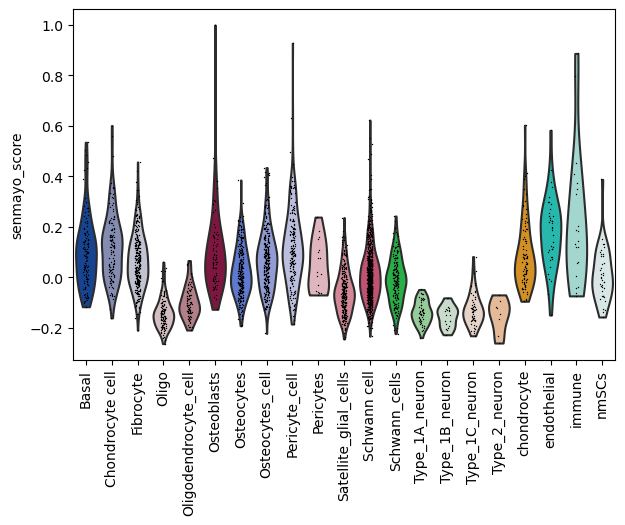

In [41]:
sc.pl.violin(merged, keys='senmayo_score', groupby='cell_type',rotation=90)

[Executed on 2023-12-12 15:21:16.064744]


/proj/sensoryaging/.conda/env/Kelly/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/proj/sensoryaging/.conda/env/Kelly/lib/python3.11/site-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


<Axes: xlabel='age', ylabel='senmayo_score'>

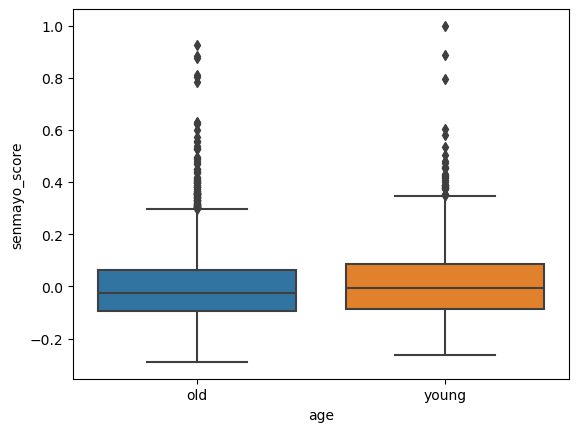

In [38]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.boxplot(x='age',y='senmayo_score',data=merged.obs)

In [40]:
import scipy.stats as stats
stats.ttest_ind(merged.obs[merged.obs['age']=='young']['senmayo_score'],merged.obs[merged.obs['age']=='old']['senmayo_score'], alternative ='greater')



[Executed on 2023-12-12 15:21:55.199118]


TtestResult(statistic=2.709731115913352, pvalue=0.003378072703457492, df=5133.0)

[Executed on 2023-12-12 15:15:27.691140]


/proj/sensoryaging/.conda/env/Kelly/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/proj/sensoryaging/.conda/env/Kelly/lib/python3.11/site-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)
/proj/sensoryaging/.conda/env/Kelly/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/proj/sensoryaging/.conda/env/Kelly/lib/python3.11/site-packages/seaborn/_ol

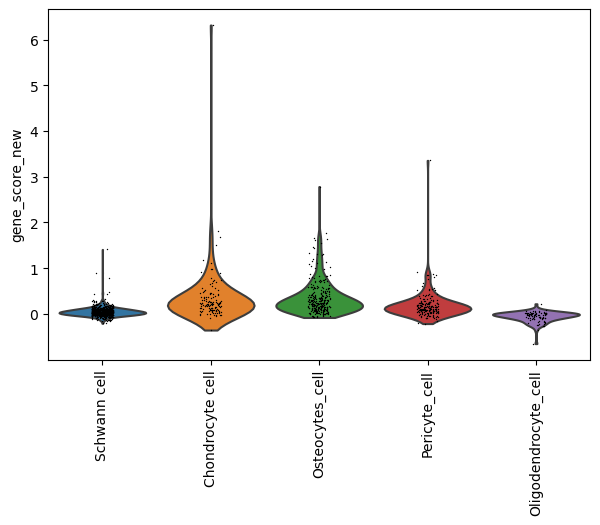

/proj/sensoryaging/.conda/env/Kelly/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/proj/sensoryaging/.conda/env/Kelly/lib/python3.11/site-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)
/proj/sensoryaging/.conda/env/Kelly/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/proj/sensoryaging/.conda/env/Kelly/lib/python3.11/site-packages/seaborn/_ol

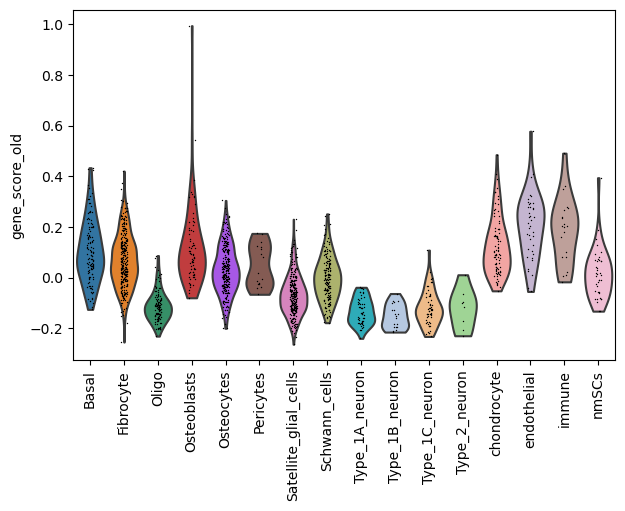

T-statistic: 9.753360028243527, P-value: 2.783510181877643e-22


In [24]:
import scanpy as sc

# Assuming df1['Gene(murine)'] contains the correct gene names
geneset = set(df1['Gene(murine)'].tolist())

# Calculating gene set scores for the new_sgns dataset
sc.tl.score_genes(new_sgns, gene_list=geneset, score_name='gene_score_new')

# Calculating gene set scores for the old_sgns dataset
sc.tl.score_genes(old_sgns, gene_list=geneset, score_name='gene_score_old')

# Comparing gene set scores
# You can now plot or statistically compare 'gene_score_new' and 'gene_score_old'
# For example, using a boxplot or a t-test

# Example: Plotting the scores
sc.pl.violin(new_sgns, keys='gene_score_new', groupby='cell_type',rotation=90,vmax=1)
sc.pl.violin(old_sgns, keys='gene_score_old', groupby='cell_type',rotation=90)

# Example: Statistical Test
# Import necessary library for statistical test
from scipy.stats import ttest_ind

# Extract the scores
scores_new = new_sgns.obs['gene_score_new']
scores_old = old_sgns.obs['gene_score_old']

# Perform t-test
t_stat, p_value = ttest_ind(scores_new, scores_old)

# Output the result
print(f"T-statistic: {t_stat}, P-value: {p_value}")


In [15]:
model=sc.read_h5ad("/proj/sensoryaging/60_plates_data/Human_data/Ml/scanvi_model/adata.h5ad")
model

[Executed on 2023-12-12 15:07:18.796621]


AnnData object with n_obs × n_vars = 851 × 3000
    obs: 'leiden', 'n_genes_by_counts', 'total_counts', 'scvi_cell_type', 'Species', '_scvi_batch', '_scvi_labels'
    var: 'n_cells', 'highly_variable', 'highly_variable_rank', 'means', 'variances', 'variances_norm', 'highly_variable_nbatches'
    uns: '_scvi_manager_uuid', '_scvi_uuid', 'hvg', 'log1p'
    obsm: 'X_pca', 'X_umap', '_scvi_extra_continuous_covs'
    layers: 'counts', 'log1p'

In [42]:
adata=sc.read_h5ad('/proj/sensoryaging/60_plates_data/Sgns/two_neuron_merged.h5ad')

[Executed on 2023-12-12 16:11:07.196545]


In [43]:
adata

[Executed on 2023-12-12 16:11:33.822962]


AnnData object with n_obs × n_vars = 203 × 30819
    obs: 'sample_ID_Plate', 'batch', 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'leiden', 'doublet_scores', 'predicted_doublets', 'sex', 'leiden_new', 'leiden_old', 'leiden_0', 'leiden_2', 'cell_type', 'leiden_no_osteocytes', 'gp0', 'gp1', 'gp2', 'gp3', 'gp4', 'gp5', 'gp6', 'leiden_R', 'age', 'platesID', 'n_counts', 'leiden_1', 'neuron', 'Neruon_age'
    var: 'mean-0', 'std-0', 'highly_variable-0-0', 'highly_variable_rank-0-0', 'means-0-0', 'variances-0-0', 'variances_norm-0-0', 'highly_variable-1-0', 'highly_variable_rank-1-0', 'means-1-0', 'variances-1-0', 'variances_norm-1-0', 'mean-1', 'std-1', 'n_cells-1', 'mt-1', 'n_cells_by_counts-1', 'mean_counts-1', 'pct_dropout_by_counts-1', 'total_counts-1', 'highly_variable-1', 'highly_variable_rank-1', 'means-1', 'variances-1', 'variances_norm-1', 'highly_variable', 'highly_variable_rank', 'means', 'variances', 'variances_norm', 'mean', 'std'
    uns:

In [44]:
adata.obs['Neruon_age'].value_counts()

[Executed on 2023-12-12 16:11:51.906842]


Neruon_age
Type1C_youth    56
Type1A_youth    54
Type1A_old      22
Type1C_old      22
Type1B_youth    19
Type1B_old      18
Type2_youth      8
Type2_old        4
Name: count, dtype: int64

In [45]:
sc.tl.score_genes(adata, gene_list=geneset, score_name='senmayo_score',ctrl_size=len(geneset))


[Executed on 2023-12-12 16:12:19.927512]


In [50]:
adata.obs['cell_type'].value_counts

[Executed on 2023-12-12 16:19:32.534228]


<bound method IndexOpsMixin.value_counts of AACTTAGTGGCCGTAATGTA-0-0    Type_1C_neuron
AAGGCCACTATGACATATGG-0-0    Type_1C_neuron
AAGGCTTGTAAAGGTAGGAT-0-0    Type_1C_neuron
AAGGCTTGTACCATAAGTCA-0-0    Type_1A_neuron
AAGTTATCGGATCCGAACAA-0-0    Type_1C_neuron
                                 ...      
TTCTTGTCGGTCCTCACGAT-1      type_1A_neuron
TTGCCAACTGTCCTGCTCTG-1      type_1B_neuron
TTGTTCGTTGCGCGCTATCA-1      type_1A_neuron
TTGTTCGTTGGCACGAGCAA-1      type_1B_neuron
TTGTTCGTTGGGATAGGAGG-1      type_1C_neuron
Name: cell_type, Length: 203, dtype: category
Categories (8, object): ['Type_1A_neuron', 'Type_1B_neuron', 'Type_1C_neuron', 'Type_2_neuron', 'type_1A_neuron', 'type_1B_neuron', 'type_1C_neuron', 'type_2_neuron']>

[Executed on 2023-12-12 17:07:32.524175]


/proj/sensoryaging/.conda/env/Kelly/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/proj/sensoryaging/.conda/env/Kelly/lib/python3.11/site-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


[Text(0, 0, 'Type_1A_neuron'),
 Text(1, 0, 'Type_1B_neuron'),
 Text(2, 0, 'Type_1C_neuron'),
 Text(3, 0, 'Type_2_neuron'),
 Text(4, 0, 'type_1A_neuron'),
 Text(5, 0, 'type_1B_neuron'),
 Text(6, 0, 'type_1C_neuron'),
 Text(7, 0, 'type_2_neuron')]

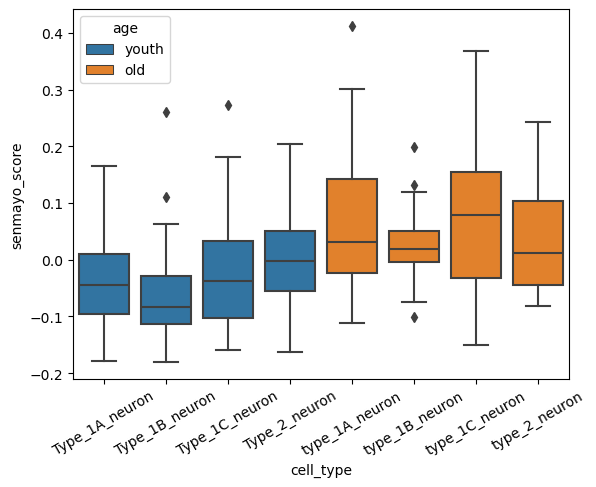

In [54]:
import seaborn as sns
ax=sns.boxplot(data=adata.obs,x='cell_type',y='senmayo_score',hue='age', dodge=False)
ax.set_xticklabels(ax.get_xticklabels(),rotation=30)

[Executed on 2023-12-12 16:12:43.004658]


/proj/sensoryaging/.conda/env/Kelly/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/proj/sensoryaging/.conda/env/Kelly/lib/python3.11/site-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)
/proj/sensoryaging/.conda/env/Kelly/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/proj/sensoryaging/.conda/env/Kelly/lib/python3.11/site-packages/seaborn/_ol

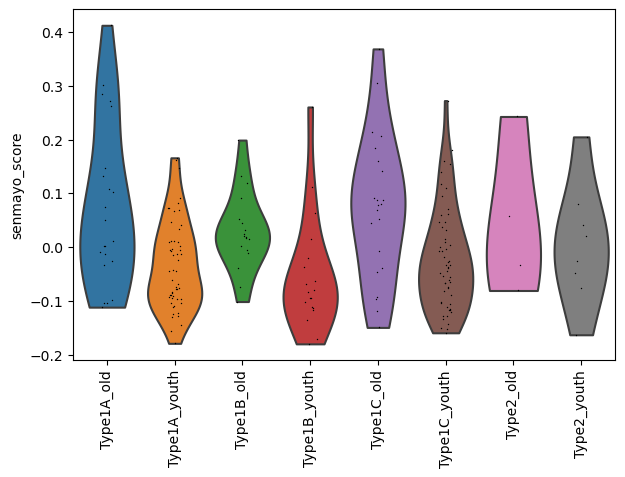

In [47]:
sc.pl.violin(adata, keys='senmayo_score', groupby='Neruon_age',rotation=90)

In [11]:
import scanpy as sc
cluster3=sc.read_h5ad('/proj/sensoryaging/60_plates_data/Sgns/each_component/neuron_annotated_remove_2.h5ad')

[Executed on 2023-12-12 22:54:50.306196]


In [12]:
cluster3

[Executed on 2023-12-12 22:54:59.039958]


AnnData object with n_obs × n_vars = 193 × 35675
    obs: 'platesID', 'batch', 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'n_counts', 'leiden', 'cell_type', 'leiden_2', 'leiden_1'
    var: 'n_cells', 'mt', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts', 'highly_variable', 'highly_variable_rank', 'means', 'variances', 'variances_norm', 'mean', 'std'
    uns: 'batch_colors', 'cell_type_colors', 'hvg', 'leiden', 'leiden_1_colors', 'leiden_2_colors', 'leiden_colors', 'log1p', 'neighbors', 'pca', 'umap'
    obsm: 'X_pca', 'X_umap', 'neuron-umap'
    varm: 'PCs'
    layers: 'Scale', 'log1p', 'reads', 'umi'
    obsp: 'connectivities', 'distances'

[Executed on 2023-12-12 22:55:18.504938]


/proj/sensoryaging/.conda/env/scvi-envir/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:1251: FutureWarning: The default value of 'ignore' for the `na_action` parameter in pandas.Categorical.map is deprecated and will be changed to 'None' in a future version. Please set na_action to the desired value to avoid seeing this warning
  color_vector = pd.Categorical(values.map(color_map))
/proj/sensoryaging/.conda/env/scvi-envir/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


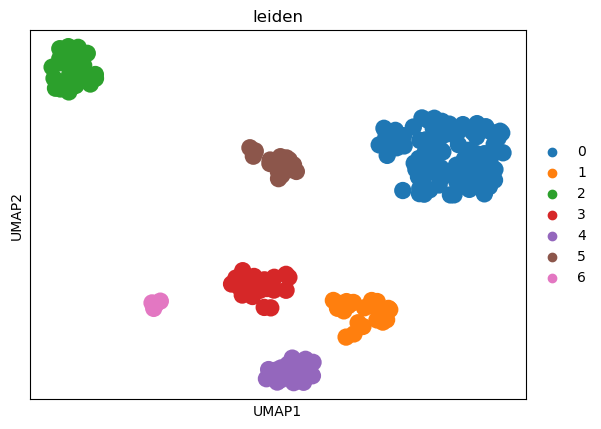

In [14]:
sc.pl.umap(cluster3, color='leiden')

[Executed on 2023-12-12 22:56:26.208018]


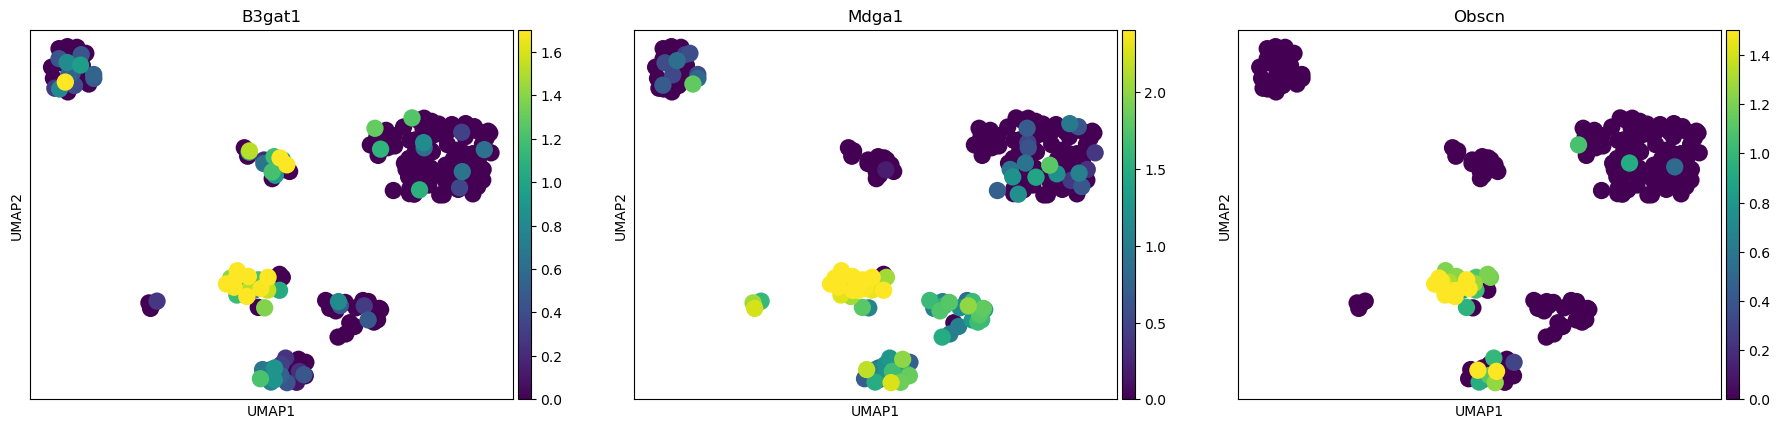

In [15]:
#'B3gat1','Mdga1','Obscn'

sc.pl.umap(cluster3, color=['B3gat1','Mdga1','Obscn'],layer='log1p',vmax='p95')

In [19]:
cluster3

[Executed on 2023-12-12 22:58:56.874305]


AnnData object with n_obs × n_vars = 193 × 35675
    obs: 'platesID', 'batch', 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'n_counts', 'leiden', 'cell_type', 'leiden_2', 'leiden_1'
    var: 'n_cells', 'mt', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts', 'highly_variable', 'highly_variable_rank', 'means', 'variances', 'variances_norm', 'mean', 'std'
    uns: 'batch_colors', 'cell_type_colors', 'hvg', 'leiden', 'leiden_1_colors', 'leiden_2_colors', 'leiden_colors', 'log1p', 'neighbors', 'pca', 'umap'
    obsm: 'X_pca', 'X_umap', 'neuron-umap'
    varm: 'PCs'
    layers: 'Scale', 'log1p', 'reads', 'umi'
    obsp: 'connectivities', 'distances'

[Executed on 2023-12-12 22:59:13.228442]


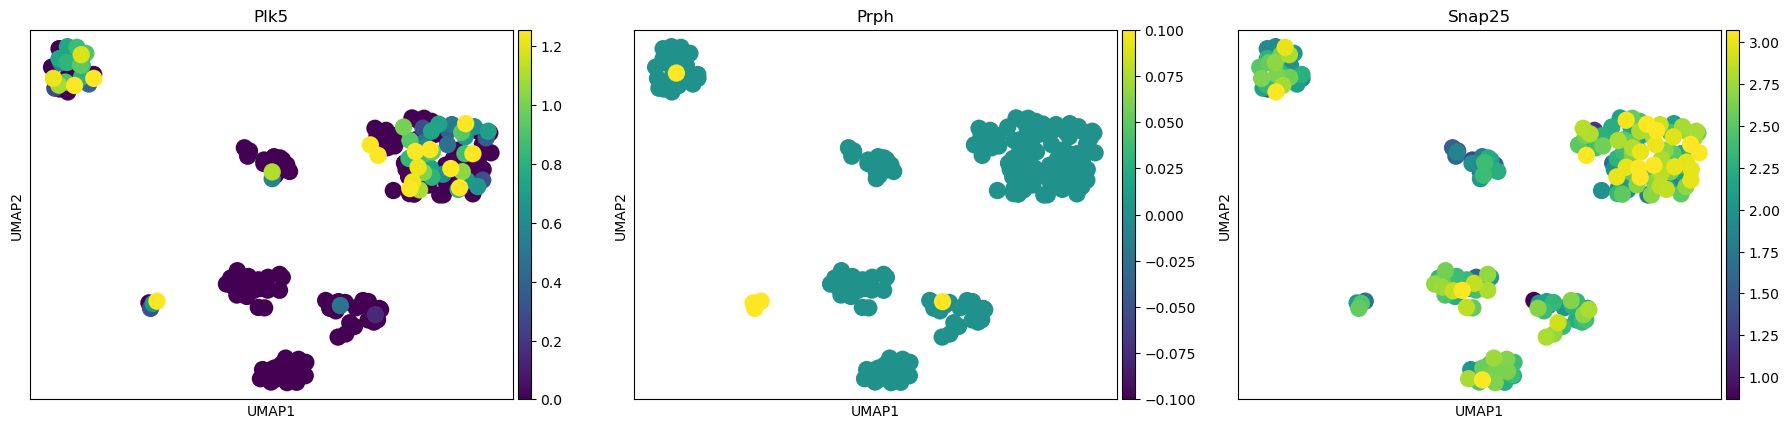

In [21]:
sc.pl.umap(cluster3,color=['Plk5','Prph','Snap25'],layer='log1p',vmax='p95')